<img src="unicamp.png" width="150" height="150">

## MO444/MC886 - Aprendizado de Máquina e Reconhecimento de Padrões

Esse trabalho foi feito pelos seguintes membros:

- Lucas Zanco Ladeira - 188951
- Rafael Scherer - 204990 

O código original deste projeto está disponível no [repositório do Github](https://github.com/lucaslzl/mo444_p2_supervised). 

## Modelos Supervisionados

## Part I - Tarefa de Regressão

<b>Declaração do problema</b> <br>"Considere que você é um goleiro em uma partida de futebol robótico na RoboCup Teen Size League. Seu oponente vai chutar uma bola contra você. Seu objetivo é prever a posição da bola para interceptá-la, ou seja, defender seu gol!"

### Descrição dos Dados

Para este projeto foram utilizadas 2 bases de dados, sendo: <i>kick1.dat</i> e <i>kick2.dat</i>. Os dados compreendem a posição (x, y, z) da bola a cada 1/3 frames com uma frequência de 60 frames por segundo de um mesmo chute. A variável <i>x</i> compreende a posição da bola em relação a extensão do gol. A variável <i>y<i/> compreende a distância da bola até o gol. A variável <i>z</i> compreende a distância da bola em relação ao solo. Os valores das variáveis se estendem sendo <i>x = -3 até +3</i>, <i>y = 0 até 2.1</i>, <i>z = 0 até 0.3</i>. Para facilitar a busca pela posição final da bola (y = 0) o valor de y é "negativado". Sendo assim, ele cresce de um valor negativo até 0. É importante descrever os dados, de forma que seja possível observar a variação em cada base de dados.

In [1]:
import pandas as pd

df = pd.read_csv('./datasets/kick1.dat', sep=' ')

df.describe()

,x,y,z
count,20.000000,20.000000,20.000000
mean,-0.727700,1.576650,0.119600
std,0.294473,0.295319,0.014605
min,-1.192000,1.109000,0.103000
25%,-0.974000,1.328750,0.109500
50%,-0.742500,1.589500,0.114000
75%,-0.519000,1.815500,0.128250
max,-0.210000,2.048000,0.149000


In [2]:
df = pd.read_csv('./datasets/kick2.dat', sep=' ')

df.describe()

,x,y,z
count,20.000000,20.000000,20.000000
mean,-0.363200,1.576650,0.237800
std,0.146036,0.295319,0.047159
min,-0.596000,1.109000,0.145000
25%,-0.491500,1.328750,0.207750
50%,-0.361000,1.589500,0.247000
75%,-0.257000,1.815500,0.280250
max,-0.105000,2.048000,0.296000


Podemos ver que ambos os chutes começam na esquerda do goleiro, pois tem valor mínimo negativo. Além disso, para a primeira base de dados a altura máxima atingida até o momento com distância <i>y</i> de 1.1 do gol é de metade da altura máxima (1.5). Na segunda base de dados, a altura atingida é de quase máxima (2.9) até a distância de 1.1 do gol.

### Metodologia

Os experimentos foram executados com 1000 iterações. A configuração dos experimentos varia de acordo com o dataset utilizado, o valor de <i>alpha</i>, e o grau da função de otimização. Sendo assim, os valores utilizados em ordem compreendem:

- Dataset
    - kick1.dat
    - kick2.dat
    
- Alpha ($\alpha$)
    - 0.01
    - 0.05
    - 0.001
    
- Grau da função
    - Linear
    - Polinomial
    
- Cálculo do erro:
    - Mean Squared Error (MSE)
    
São executadas todas as possíveis combinações as quais geram um grande número de resultados distintos, portanto, serão apenas descritos resultados selecionados de forma para apresentar o funcionamento do que foi implementado.

A função linear se refere a: $$y = \theta_0 \cdot x_0 + \theta_1 \cdot x_1 + \theta_2$$

Já a função polinomial se refere a: $$y = \theta_0 \cdot x^2_0 + \theta_1 \cdot x^2_1 + \theta_2$$ 

É necessário mencionar que o algoritmo foi implementado de forma a aceitar uma lista de valores $x$, os quais geram $\theta$s aleatórios, e buscam esses $x$s na base de dados de entrada. 

Considerando as variáveis $x$, $y$ e $z$ como descritas no enunciado do trabalho, para o cálculo do valor de $x$ foi utilizada, em ambas as funções, apenas o $y$. O mesmo vale para o $z$. Sendo assim, apenas é considerado o $y$ para calcular $x$ e $z$ separadamente.

### Código Fonte

O código fonte dos experimentos e da implementação do gradiente descendente estão disponíveis na pasta <b>src</b>. Como o código dos experimentos e o que gera os gráficos tem mais de 300 linhas não será colocado aqui no relatório, sendo ele, apenas executado por uma célula. Além disso, são geradas mais de 16 imagens, não sendo interessante apresentá-las todas em uma mesma célula.

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 410.06it/s]


      Dataset                Type  X  Y  Alpha  \
0   kick1.dat      LinearGradient  y  z  0.010   
1   kick1.dat      LinearGradient  y  x  0.010   
2   kick1.dat  PolinomialGradient  y  z  0.010   
3   kick1.dat  PolinomialGradient  y  x  0.010   
4   kick1.dat      LinearGradient  y  z  0.050   
5   kick1.dat      LinearGradient  y  x  0.050   
6   kick1.dat  PolinomialGradient  y  z  0.050   
7   kick1.dat  PolinomialGradient  y  x  0.050   
8   kick1.dat      LinearGradient  y  z  0.001   
9   kick1.dat      LinearGradient  y  x  0.001   
10  kick1.dat  PolinomialGradient  y  z  0.001   
11  kick1.dat  PolinomialGradient  y  x  0.001   
12  kick2.dat      LinearGradient  y  z  0.010   
13  kick2.dat      LinearGradient  y  x  0.010   
14  kick2.dat  PolinomialGradient  y  z  0.010   
15  kick2.dat  PolinomialGradient  y  x  0.010   
16  kick2.dat      LinearGradient  y  z  0.050   
17  kick2.dat      LinearGradient  y  x  0.050   
18  kick2.dat  PolinomialGradient  y  z  0.050   


<Figure size 432x288 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

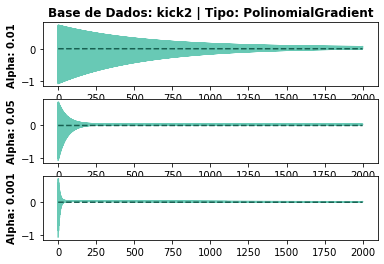

In [1]:
from src import exp1

exp1.main()

<b>Gradiente Descendente</b>

Ambas as implementações (Linear e Polinomial) tem o mesmo conjunto de métodos, sendo eles:

- function<br>
Faz o cálculo da função desejada.
<br>
- mse<br>
Faz o cálculo do MSE considerando a multiplicação pela variável ao lado de $\theta$ caso exista.
<br>

- update_theta<br>
Faz a chamada para o cálculo do MSE e atualiza o $\theta$ de acordo com o $\alpha$.
<br>

- fit<br>
Chama a atualização dos $\theta$s uma quantidade fixa de vezes.
<br>

- get_thetas<br>
Retorna os valores de $\theta$s ao chamar.
<br>

- predict<br>
Calcula o resultado da função.
<br>

- get_mse<br>
Retorna todos os valores obtidos durante o cálculo do MSE para cada $\theta$.

#### LinearGradient

In [ ]:
class LinearGradient:
    """
        Linear Gradient Descent
        y = theta_0*1 + theta_1*x_1 + theta_2*x_2
    """


    def __init__(self, data: pd.DataFrame, x: list, y: str, alpha=0.01):
        
        self.data = data
        self.x = x
        self.y = y
        self.alpha = alpha
        np.random.seed(42)
        self.thetas = np.random.rand(len(x)+1)

        # Add theta_0 column
        self.data['joker'] = [1] * self.data.shape[0]
        self.x.append('joker')

        self.calculated_mse = []


    def function(self, row):
        
        ys = [row[c]*self.thetas[i] for i, c in enumerate(self.x)]
        ys = np.sum(ys)
        return (ys - row[self.y])


    def mse(self, i):
        
        summ = 0

        for indx, row in self.data.iterrows():
            summ += self.function(row) * row[self.x[i]]

        result = summ / self.data.shape[0]

        self.calculated_mse.append(result)

        return result


    def update_theta(self):
        
        tmp_thetas = []

        for i, theta in enumerate(self.thetas):

            tmp_theta = theta - self.alpha * self.mse(i)
            tmp_thetas.append(tmp_theta)

        self.thetas = tmp_thetas


    def fit(self, data):

        for steps in tqdm(range(1000)):
            self.update_theta()


    def get_thetas(self):
        return self.thetas

    
    def predict(self, values: list):

        values.append(1)

        res = 0
        for i, theta in enumerate(self.thetas):
            res += theta * values[i]

        return res
    
    
    def get_mse(self):
        return self.calculated_mse

#### PolynomialGradient

In [ ]:
class PolynomialGradient:
    """
        Polinomial Gradient Descent
        y = theta_0*1 + theta_1*(x_1**2) + theta_2*(x_1)
    """


    def __init__(self, data: pd.DataFrame, x: list, y: str, alpha=0.01):
        
        self.data = data
        self.x = x
        self.y = y
        self.alpha = alpha
        self.thetas = np.random.rand(len(x)+1)

        # Add theta_0 column
        self.data['joker'] = [1] * self.data.shape[0]
        self.x.append('joker')

        self.calculated_mse = []


    def function(self, row):
        
        ys = [self.thetas[i]*(row[c]**2) for i, c in enumerate(self.x)]
        ys = np.sum(ys)
        return (ys - row[self.y])


    def mse(self, i):
        
        summ = 0

        for indx, row in self.data.iterrows():
            summ += self.function(row) * row[self.x[i]]**2

        result = summ / self.data.shape[0]

        self.calculated_mse.append(result)

        return result


    def update_theta(self):
        
        tmp_thetas = []

        for i, theta in enumerate(self.thetas):

            tmp_theta = theta - self.alpha * self.mse(i)
            tmp_thetas.append(tmp_theta)

        self.thetas = tmp_thetas


    def fit(self, data):

        for steps in tqdm(range(1000)):
            self.update_theta()


    def get_thetas(self):
        return self.thetas


    def predict(self, values: list):

        values.append(1)

        res = 0
        for i, theta in enumerate(self.thetas):
            res += theta * (values[i]**2)

        return res

    
    def get_mse(self):
        return self.calculated_mse

### Resultados

Os resultados compreendem comparações entre as funções obtidas e os dados de entrada. Como também, comparações entre os diferentes parâmetros iniciais e o MSE obtido.

<b>Modelos Obtidos</b>

Nas figuras a seguir é possível observar as seguintes características: os dados de cada base de dados, representados por círculos; a reta ou parábola gerada pelas funções linear e polinomial respectivamente; um desenho do campo igual ao encontrado no enunciado do trabalho; a trave; e por fim, um retângulo azul claro que representa a área que o goleiro consegue defender. Para a última foi considerado um alcance em $x$ de 1 metro para cada lado. <b>As funções apresentadas nesta seção utilizam as variáveis do enunciado para facilitar o entendimento</b>.

Primeiramente serão apresentados os resultados da base de dados kick1, com função linear, para todos os valores de $\alpha$. Os valores resultantes aproximados para cada $\theta$ compreendem:

- $\alpha = 0.01$
    - $ z = y \cdot 0.374 + 0.724$
    - $ x = y \cdot 0.457 + 0.047$

- $\alpha = 0.05$
    - $ z = y \cdot 0.141 + 0.347$
    - $ x = y \cdot -0.423 - 1.373$
    
- $\alpha = 0.001$
    - $ z = y \cdot 0.461 + 0.871$
    - $ x = y \cdot 0.782 + 0.603$
    
Podemos observar que para os valores de $\alpha$ iguais a 0.01 e 0.001, a trajetória da bola passa por cima do trave e do goleiro. Já para $\alpha$ igual a 0.05 quase foi gol, sendo fora do alcance do goleiro mas ainda acima da altura da trave. Além disso, a reta descreve o comportamento dos dados para os eixos $x$ e $y$. Vemos uma diferença mais clara nos valores preditos de $z$ pela variação da altitude observada nos dados de entrada.

<table><tr><td><img src='plots/kick1.dat_LinearGradient_0.01.png'></td><td><img src='plots/kick1.dat_LinearGradient_0.05.png'></td><td><img src='plots/kick1.dat_LinearGradient_0.001.png'></td></tr></table>

Agora serão apresentados os resultados da base de dados kick1, com função polinomial, para todos os valores de $\alpha$. Os valores resultantes aproximados para cada $\theta$ compreendem:

- $\alpha = 0.01$
    - $ z = y \cdot -0.023 + 0.187$
    - $ x = y \cdot 0.112 - 0.959$

- $\alpha = 0.05$
    - $ z = y \cdot 0.002 + 0.112$
    - $ x = y \cdot 0.309 - 1.522$
    
- $\alpha = 0.001$
    - $ z = y \cdot -0.062 + 0.298$
    - $ x = y \cdot -0.179 - 0.126$
    
Podemos observar que para os valores de $\alpha$ iguais a 0.01 e 0.001 o goleiro conseguiu defender, sendo que, a bola iria entrar no gol. Já para $\alpha$ igual a 0.05 foi gol, passando fora do alcance do goleiro. No entanto, ao observar a distribuição dos dados e os valores preditos pela função vemos que o comportamento é um pouco diferente do esperado nos eixos $x$ e $z$. Portanto, para $\alpha$ igual a 0.05 o comportamento é bem mais próximo do esperado.

<table><tr><td><img src='plots/kick1.dat_PolinomialGradient_0.01.png'></td><td><img src='plots/kick1.dat_PolinomialGradient_0.05.png'></td><td><img src='plots/kick1.dat_PolinomialGradient_0.001.png'></td></tr></table>

Serão apresentados os resultados da base de dados kick2, com função linear, para todos os valores de $\alpha$. Os valores resultantes aproximados para cada $\theta$ compreendem:

- $\alpha = 0.01$
    - $ z = y \cdot 0.367 + 0.825$
    - $ x = y \cdot 0.438 + 0.363$

- $\alpha = 0.05$
    - $ z = y \cdot0.234 + 0.61$
    - $ x = y \cdot -0.126 - 0.548$
    
- $\alpha = 0.001$
    - $ z = y \cdot 0.417 + 0.909$
    - $ x = y \cdot 0.647 + 0.72$
    
Podemos observar que para todos os valores de $\alpha$ a trajetória da bola passa por cima do trave e do goleiro. Para o valor de $\alpha$ igual a 0.05, vemos que existe uma diferença comparado com os outros valores de $\alpha$ no eixo $z$. Esse mesmo comportamento é observado para função linear na base de dados kick1.

<table><tr><td><img src='plots/kick2.dat_LinearGradient_0.01.png'></td><td><img src='plots/kick2.dat_LinearGradient_0.05.png'></td><td><img src='plots/kick2.dat_LinearGradient_0.001.png'></td></tr></table>

Serão apresentados os resultados da base de dados kick2, com função polinomial, para todos os valores de $\alpha$. Os valores resultantes aproximados para cada $\theta$ compreendem:

- $\alpha = 0.01$
    - $ z = y \cdot -0.043 + 0.348$
    - $ x = y \cdot 0.049 - 0.46$

- $\alpha = 0.05$
    - $ z = y \cdot -0.047 + 0.36$
    - $ x = y \cdot 0.153 - 0.756$
    
- $\alpha = 0.001$
    - $ z = y \cdot -0.037 + 0.332$
    - $ x = y \cdot -0.103 - 0.022$
    
Podemos observar que para todos os valores de $\alpha$ o goleiro conseguiu defender a bola, mesmo que, a trajetória predita iria para fora do gol. Comparando o comportamento dos dados e os valores preditos pela função vemos uma diferença grande para $\alpha$ igual a 0.001, sendo que, é possível que 1000 iterações não tenha sido suficiente para obter um resultado melhor.

<table><tr><td><img src='plots/kick2.dat_PolinomialGradient_0.01.png'></td><td><img src='plots/kick2.dat_PolinomialGradient_0.05.png'></td><td><img src='plots/kick2.dat_PolinomialGradient_0.001.png'></td></tr></table>

<b>Variação dos valores de $\alpha$</b>

A figura a seguir apresenta os resultados obtidos pelo cálculo de MSE para a primeira base de dados com o método gradiente descendente para a variável $x$ do enunciado. Como os resultados são bem próximos para ambas as bases, como também, para a variável $z$ do enunciado, não serão descritos no relatório. No entanto, é possível verificar na pasta "plots" esses resultados. Como no eixo x estão apresentados todos os valores de $\theta$, então com 2 $\theta$s na equação e com 1000 iterações temos 2000 valores de MSE.

<table><tr><td><img src='plots/mses_kick1.dat_LinearGradient.png'></td><td><img src='plots/mses_kick1.dat_PolinomialGradient.png'></td></tr></table>

Na figura da função linear, podemos observar que para $\alpha = 0.01$ o modelo demora várias iterações para chegar a um valor próximo de 0. Aproximadamente este valor de $\alpha$ leva 800 iterações para chegar no valor mínimo de erro. Já para $\alpha = 0.05$ foi possível chegar ao valor mínimo com cerca de 250 iterações. Por fim, com $\alpha = 0.001$ foi possível chegar ao valor mínimo de erro com cerca de 100 iterações. O mesmo comportamento pode ser observado para a função polinomial, sendo que, ambas as funções utilizam o valor da variável, ao quadrado ou não, multiplicado por $\theta_0$ e somado com um $\theta_1$.

<b>Considerações Finais</b>

Foi observado nos resultados o impacto do valor de $\alpha$ para diminuir o erro, sendo que, encontramos valores de mínimo local para as funções polinomiais em ambas as bases de dados com $\alpha$ igual a 0.001. Para usar o método do gradiente descendente é necessário escolher bem a função utilizada (tanto como o grau da função) e o valor de $\alpha$. Como neste trabalho não foi necessário avaliar diferentes funções para identificar a melhor para estes conjuntos de dados, então, ficamos satisfeitos com os resultados mostrando que o algoritmo proposto foi implementado corretamente.

## Part II - Tarefa de classificação

<b>Declaração do problema</b>
<br>"Você deve resolver um problema de classificação utilizando métodos de aprendizado supervisionado. Para esta tarefa,
 será utilizado um conjunto de dados composto por imagens de dígitos manuscritos, sendo o objetivo da tarefa classificar os
 dígitos com base nas suas respectivas imagens."

### Dependências

In [ ]:
import sys
!{sys.executable} -m pip install umap-learn

### Imports

In [3]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import umap
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

### Definindo seed para geração de valores aleatórios

In [4]:
seed = 1337

#### Carregando os dados

In [5]:
dataset = load_digits()

### Descrição dos dados

Para esta tarefa, foi utilizado o conjunto de dados MNIST, que contém milhares de imagens digitalizadas de dígitos manuscritos.
<br>Há um total de 1797 imagens e cada imagem é representada por uma matriz quadrada de dimensão 8, totalizando 64 atributos, com valores na escala de cinza, variando de 0 a 16.
<br>Por fim, para cada imagem, há um label associado, que indica qual número está a ser representado na imagem, havendo um total de 10 valores possíveis, que são os dígitos de 0 a 9.

In [6]:
print('Formato das imagens: {}'.format(dataset.images.shape))
print('Possíveis labels: {}'.format(dataset.target_names))
print('Menor valor na representação das imagens: {}'.format(np.ravel(dataset.images).min()))
print('Maior valor na representação das imagens: {}'.format(np.ravel(dataset.images).max()))

Formato das imagens: (1797, 8, 8)
Possíveis labels: [0 1 2 3 4 5 6 7 8 9]
Menor valor na representação das imagens: 0.0
Maior valor na representação das imagens: 16.0


### Distribuição dos valores

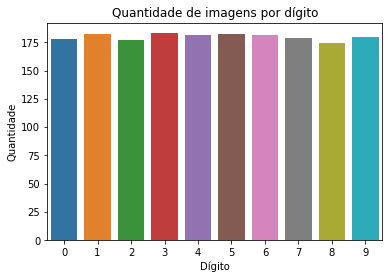

In [7]:
sns.countplot(data=pd.DataFrame(dataset.target), x=0)
plt.title('Quantidade de imagens por dígito')
plt.xlabel('Dígito')
plt.ylabel('Quantidade')
plt.show()

Pelo gráfico acima, nota-se que o conjunto de dados apresenta uma distribuição equilibrada em relação aos dígitos, havendo, em média, cerca de 180 imagens por dígito.

### Exemplos

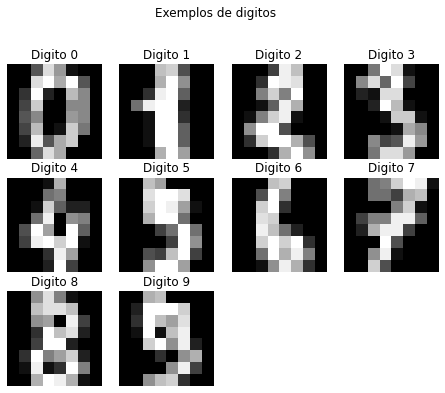

In [8]:
fig = plt.figure(figsize = (8,8))
fig.suptitle('Exemplos de digitos')
gs1 = gridspec.GridSpec(4, 4)
gs1.update(wspace=0.025, hspace=0.2)

for i in range(10):
    image = dataset.images[i]
    label = dataset.target[i]
    ax1 = plt.subplot(gs1[i])
    ax1.imshow(image, cmap='gray')
    ax1.set_title('Digito {}'.format(i))
    ax1.set_aspect('equal')
    ax1.grid(color='white')
    plt.axis('off')

plt.show()

### Visualização dos dados

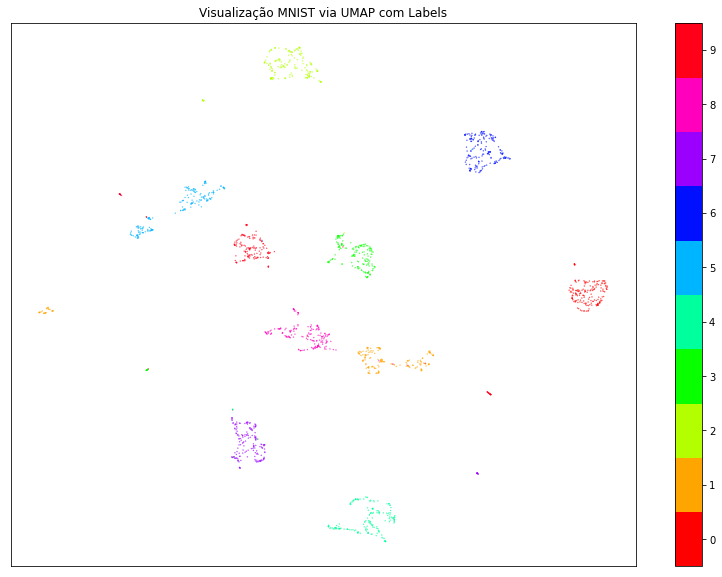

In [9]:
embedding = umap.UMAP(n_neighbors=5, random_state=seed).fit_transform(dataset.data)
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.1, c=dataset.target, cmap='hsv', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(dataset.target_names)
plt.title('Visualização MNIST via UMAP com Labels')
plt.show()

### Metodologia

Foram executados experimentos com dois algoritmos de aprendizado supervisionado: SVM (Support Vector Machine) e Random Forest.<br>
Os dados foram separados conjuntos de treino e teste, na proporção 9:1 e, para avaliar o efeito da normalização de dados, foram realizados dois experimentos para cada algoritmo, um com dados normalizados e outro sem.<br>
Para realização da validação cruzada, utilizou-se o método k-fold com 3 divisões, através da função StratifiedKFold do Scikit-learn.<br>
A otimização de hiperparâmetros foi realizada através da função GridSearchCV do Scikit-learn,
que, dado um modelo, um método de validação cruzada e um dicionário de parâmetros, avalia todas as combinações de parâmetros possíveis para o modelo, retornando aquele com melhor performance dentre os avaliados.
Para cada algoritmo, os seguintes parâmetros foram avaliados:
- SVM
 - gamma: 0.1, 0.01, 0.001
 - C: 1, 5, 10
 - kernel: rbf, linear, sigmoid
- Random Forest
 - n_estimators: 100, 500, 1000
 - max_features: auto, log2
 - max_depth: 20, 30, 40
 - min_samples_split: 2, 5, 10
 - min_samples_leaf: 2, 5, 10

Por fim, o melhor modelo obtido para um dos algoritmos foi avaliado em relação ao conjunto de testes.

### Código Fonte

De modo a facilitar a execução dos experimentos, foi criada uma classe Classifier que contém o código compartilhado entre os experimentos com ambos algoritmos.
Os métodos dessa classe são:
- fit: executa o treinamento do modelo, dado o conjunto de dados de treinamento.
- training_score: apresenta informações sobre o melhor modelo encontrado.
- test_score: apresenta um relatório contendo diversas métricas sobre o modelo.
- confusion_matrix: apresenta a matriz de confusão do modelo, dado o conjunto de dados de teste.
- show_errors: exibe até 16 imagens que foram classificada incorretamente pelo modelo.

In [10]:
class Classifier:
  def __init__(self, model, hyper_params, seed):
    self.base_model = model
    self.best_model = None
    self.hyper_params = hyper_params
    self.seed = seed

  def fit(self, x_train, y_train):
    folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=self.seed)

    model_cv = GridSearchCV(estimator = self.base_model,
                            param_grid = self.hyper_params,
                            scoring= 'accuracy',
                            cv=folds,
                            verbose=1,
                            return_train_score=True,
                            n_jobs=-1)

    model_cv.fit(x_train, y_train)

    self.best_model = model_cv

  def training_score(self):
    print('Acurácia de treinamento: {}'.format(self.best_model.best_score_))
    print('Melhores parâmetros encontrados: {}'.format(self.best_model.best_params_))

  def test_score(self, x_test, y_test):
    print('Acurácia de teste: {}'.format(self.best_model.score(x_test, y_test)))
    y_pred = self.best_model.predict(x_test)
    print(classification_report(y_test, y_pred))

  def confusion_matrix(self, x_test, y_test):
    y_pred = self.best_model.predict(x_test)
    cmrforest = confusion_matrix(y_test , y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cmrforest, annot=True, cmap='viridis', fmt = 'd')
    plt.title('Matriz de confusão')
    plt.xlabel('Previsto')
    plt.ylabel('Esperado')
    plt.show()

  def show_errors(self, x_test, y_test):
    y_pred = self.best_model.predict(x_test)
    errors = y_pred != y_test

    predicted_labels = y_pred[errors]
    real_labels = y_test[errors]
    images_with_errors = x_test[errors]
    errors_size = len(images_with_errors)

    fig = plt.figure(figsize = (8, 8))
    fig.suptitle('Imagens classificadas incorretamente')
    gs1 = gridspec.GridSpec(4, 4)
    gs1.update(wspace=0.1, hspace=0.2)

    for image, real, predicted, index in zip(images_with_errors, real_labels, predicted_labels, range(errors_size)):
      ax1 = plt.subplot(gs1[index])
      ax1.imshow(image.reshape(8, 8), cmap='gray')
      ax1.set_title('Esperado {0}\n Previsto: {1}'.format(real, predicted))
      ax1.set_aspect('equal')
      ax1.grid(color='white')
      plt.axis('off')

    plt.show()

### Experimentos

#### Divisão dos dados

In [11]:
# dados não normalizados
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.1, random_state=seed)

# dados normalizados
normalizer = Normalizer()
normalized_data = normalizer.fit_transform(dataset.data)
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(normalized_data, dataset.target, test_size=0.1, random_state=seed)


### Treinamento do primeiro modelo - SVM
#### Hiperparâmetros

In [12]:
hyper_params_svm = [ {'gamma': [0.1, 0.01, 0.001],
                     'C': [1, 5, 10],
                  'kernel': ['rbf', 'linear', 'sigmoid']}]

#### Treinamento com dados não normalizados

In [13]:
svm = Classifier(model=SVC(), hyper_params=hyper_params_svm, seed=seed)
svm.fit(x_train, y_train)
svm.training_score()

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Acurácia de treinamento: 0.9888682745825603
Melhores parâmetros encontrados: {'C': 5, 'gamma': 0.001, 'kernel': 'rbf'}


#### Treinamento com dados normalizados

In [14]:
svm_norm = Classifier(model=SVC(), hyper_params=hyper_params_svm, seed=seed)
svm_norm.fit(x_train_norm, y_train_norm)
svm_norm.training_score()

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Acurácia de treinamento: 0.9789734075448361
Melhores parâmetros encontrados: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}


### Treinamento do segundo modelo - Random Forest
#### Hiperparâmetros

In [15]:
hyper_params_rf = {'n_estimators': [100, 500, 1000],
              'max_features': ['auto', 'log2'],
              'max_depth': [20, 30, 40],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [2, 5, 10]}

#### Treinamento com dados não normalizados

In [16]:
rf = Classifier(model=RandomForestClassifier(random_state=seed), hyper_params=hyper_params_rf, seed=seed)
rf.fit(x_train, y_train)
rf.training_score()

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Acurácia de treinamento: 0.9672232529375387
Melhores parâmetros encontrados: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1000}


#### Treinamento com dados normalizados

In [17]:
rf_norm = Classifier(model=RandomForestClassifier(random_state=seed), hyper_params=hyper_params_rf, seed=seed)
rf_norm.fit(x_train_norm, y_train_norm)
rf_norm.training_score()

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Acurácia de treinamento: 0.9659863945578232
Melhores parâmetros encontrados: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}


### Resultados
Inicialmente, nota-se que, tanto para a SVM quanto para a Random Forest, houve uma maior acurácia nos modelos que foram
treinados com dados não normalizados, de modo que esses modelos serão utilizados para a avaliação em relação ao conjunto
de testes.<br>
A seguir, serão exibidas as métricas, matriz de confusão e classificações incorretas em relação ao conjunto de testes para cada modelo.
#### SVM - métricas

In [18]:
svm.test_score(x_test, y_test)

Acurácia de teste: 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        23
           3       1.00      0.96      0.98        23
           4       1.00      1.00      1.00        20
           5       0.92      1.00      0.96        12
           6       1.00      1.00      1.00        16
           7       0.86      1.00      0.92        12
           8       0.95      1.00      0.98        20
           9       1.00      0.81      0.90        16

    accuracy                           0.98       180
   macro avg       0.97      0.98      0.97       180
weighted avg       0.98      0.98      0.98       180



#### SVM - Matriz de confusão

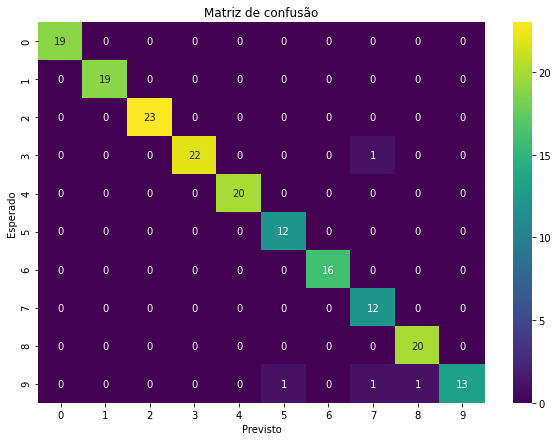

In [19]:
svm.confusion_matrix(x_test, y_test)

#### SVM - Classificações incorretas

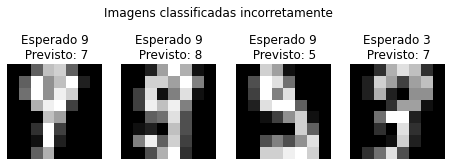

In [20]:
svm.show_errors(x_test, y_test)

#### Random Forest - métricas

In [21]:
rf.test_score(x_test, y_test)

Acurácia de teste: 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        23
           3       1.00      0.96      0.98        23
           4       1.00      1.00      1.00        20
           5       0.92      1.00      0.96        12
           6       1.00      1.00      1.00        16
           7       0.86      1.00      0.92        12
           8       0.95      1.00      0.98        20
           9       1.00      0.81      0.90        16

    accuracy                           0.98       180
   macro avg       0.97      0.98      0.97       180
weighted avg       0.98      0.98      0.98       180



#### Random Forest - Matriz de confusão

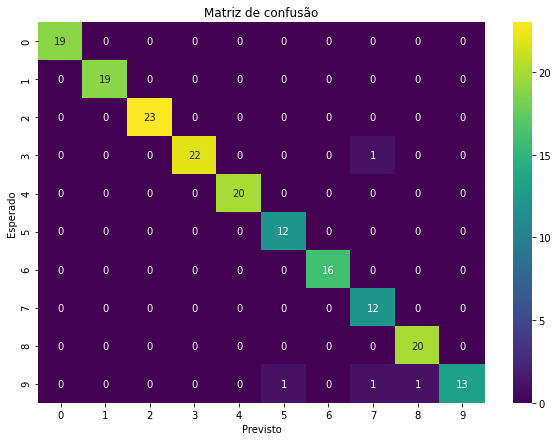

In [22]:
rf.confusion_matrix(x_test, y_test)

#### Random Forest - Classificações incorretas

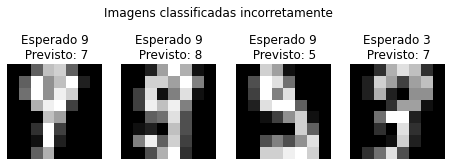

In [23]:
rf.show_errors(x_test, y_test)

#### Considerações finais
Nota-se que, em relação ao conjunto de treinamento, a normalização dos dados não apresentou o efeito esperado, de modo que
os modelos treinados com dados não normalizados apresentaram resultados melhores em comparação com os modelos que foram treinados com dados normalizados.
<br>Ademais, após análise dos resultados, percebe-se que, apesar dos modelos - SVM e Random Forest - terem apresentado diferença na acurácia
em relação ao conjunto de treinamento, ambos modelos alcançaram a mesma performance quando submetidos ao conjunto de testes,
obtendo cerca de 97.78% de acurácia e 98% de precisão, recall e f1 (considerado as médias ponderadas).
Ambos modelos classificaram 4 imagens incorretamente de um total
de 180 no conjunto de testes, dentre os erros, tem-se que o dígito 9 apresentou a maior taxa de erro, sendo classificado incorretamente
3 vezes com uma taxa de recall 0.81, seguido pelo dígito 3, que foi classificado incorretamente 1 vez com uma taxa de recall 0.96.

## Contribuições
<br>
O membro do grupo <b>Lucas Zanco Ladeira</b> contribuiu com toda a implementação, validação e escrita da parte I deste trabalho.

O membro do grupo <b>Rafael Scherer</b> contribuiu com toda a implementação, validação e escrita da parte II deste trabalho.